### transpose

In [11]:
import numpy as np
newArray = np.arange(10).reshape(2,5)
print("================")

print(newArray)
print("================")
print(newArray.transpose())
tArray= newArray.transpose()
print("================")
print(tArray.T)
print("================")
print(newArray.T@newArray)
print("================")
print(newArray@newArray.T)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[25 30 35 40 45]
 [30 37 44 51 58]
 [35 44 53 62 71]
 [40 51 62 73 84]
 [45 58 71 84 97]]
[[ 30  80]
 [ 80 255]]


## 讀存檔案
+ 可使用 np.loadtxt( ) 方法進行檔案的讀取。
+ 若不需要讀入第一列，可使用 skiprows=1 來忽略第一列。
+ 若我們的資料是利用 ‘,’ 當作資料與資料之間的分格符號，可使用 delimiter=‘ , ’ 設定，預設為空白。
+ 若設定 unpack=True 代表可以將 Column 分別切出來 (預設為False)。
+ 但是，當我們欲要讀的檔案，裡面有遺失值的時候，loadtxt 這個動作將會產生錯誤。loadtxt( ) 必須是在每一 row 都有相同數量的 value 下，才可以使用。
  + 建議改用 genfromtxt( ) 方法 ，它可以針對遺失值進行處理。
  + 參數加上 filling_values 可以把原本缺失的資料補上指定的資料。
+ 可利用 savetxt( ) 將資料存進檔案裡面保存。
+ genfromtxt 可透過 skip_header=1  參數忽略第一列。
+ 碰到遺失值的處理：
  + loadtxt 碰到遺失值會產生錯誤。
  + genfromtxt 碰到遺失值會以 nan 來表示。
+ genfromtxt 進行存取時：
  + 資料預設為浮點數(科學記數法)，所以建議儲存的時候以 fmt 進行格式設定。
  + 開啟時若資料為整數，請加入 dtype 設定為 int

In [34]:
import numpy as np
x = np.loadtxt("data1.csv",skiprows = 1,delimiter=',')
print(x)
# print(x[:,0])
# print(x[:,1])
x,y= np.loadtxt("data1.csv",skiprows = 1,unpack=True,delimiter=',')
print(x)
print(y)

z = np.loadtxt("data1.csv",skiprows = 1,unpack=True,delimiter=',')
print(z)
print(z[0,:])
print(z[1,:])

[[0.4 0.3]
 [0.1 0.6]
 [0.1 0.3]
 [0.5 0.3]]
[0.4 0.1 0.1 0.5]
[0.3 0.6 0.3 0.3]
[[0.4 0.1 0.1 0.5]
 [0.3 0.6 0.3 0.3]]
[0.4 0.1 0.1 0.5]
[0.3 0.6 0.3 0.3]


In [35]:
import numpy as np
x = np.loadtxt('data2.csv',skiprows=1, delimiter=',')
print(x)

ValueError: could not convert string '' to float64 at row 0, column 2.

In [36]:
import numpy as np
a = np.genfromtxt('data2.csv',delimiter=',',skip_header=1)
print(a)

[[0.4 nan]
 [0.1 0.6]
 [0.1 0.3]
 [nan 0.3]]


In [37]:
b = np.genfromtxt('data2.csv',delimiter=",",skip_header=1,filling_values=0.001)
print(b)

[[0.4   0.001]
 [0.1   0.6  ]
 [0.1   0.3  ]
 [0.001 0.3  ]]


## 總和最大與最小
+ np.sum( ) 代表某一個陣列內容的總和，也可以指定這個陣列的哪一軸 (axis) 內容總和。
+ np.min( ) 代表某一個陣列內容的最小值，也可以指定這個陣列的哪一軸 (axis) 內容的最小值。
+ np.max( ) 代表某一個陣列內容的最大值，也可以指定這個陣列的哪一軸 (axis) 內容的最大值。
+ amin 與 min 是相同功能的方法。
+ amax 與 max 是相同功能的方法。

### 總和sum()

In [39]:
import numpy as np
a = np.array([[0, 30,45],
              [60,75,90]])
print(a)
print("---------------")
b=np.sum(a)# 無選軸 每個元素相加
print(b)
print("---------------")
b=np.sum(a,axis=0) #拿row的陣列相加
print(b)
print("---------------")
b=np.sum(a,axis=1)#每個陣列的colum相加
print(b)
print("---------------")

[[ 0 30 45]
 [60 75 90]]
---------------
300
---------------
[ 60 105 135]
---------------
[ 75 225]
---------------


### max() min()

In [44]:
import numpy as np
a = np.array([[0, 75,45],
              [60,30,90]])
print(a)
print("---------------")
b=np.max(a)
bi=np.argmax(a)#
print(b)
print(bi)

print("---------------")
b=np.max(a,axis=0)#拿每個row的陣列找出最大值
bi=np.argmax(a,axis=0)#拿每個row的陣列找出最大值
print(b)
print(bi)
print("---------------")
b=np.max(a,axis=1)#拿每個colum內容比較找出最大值
bi=np.argmax(a,axis=1)#拿每個colum的陣列找出最大值
print(b)
print(bi)
print("---------------")

[[ 0 75 45]
 [60 30 90]]
---------------
90
5
---------------
[60 75 90]
[1 0 1]
---------------
[75 90]
[1 2]
---------------


## 中位數與平均
+ median( ) 方法可取出陣列或陣列中指定的軸之中位數。
+ 把所有值高低排序後找出正中間的一個作爲中位數。如果資料數量為偶數，則中位數取最中間的兩個數值的平均數。
+ 參數：
  + array：陣列
  + axis：軸
+ mean( ) 方法可取出陣列或陣列中指定的軸之平均數。
+ 平均值就是把陣列或指定軸的所有資料除以數量後的數值。
+ 參數：
    + array：陣列 
    + axis：軸
+ average( ) 方法與 mean( ) 方法相似，但可以加入權重進行計算。
+ 計算公式為 ((資料*權重)相加)/(權重相加)
+ 參數：
  + array：陣列
  + axis：軸
  + weights：權重，若沒有則設定為 1
  + returned：若設定為 true，代表返回計算結果跟權重相加總合兩筆資料，若沒有設定或設定  false 則只有計算結果 
+ 沒有指定權重時與一般平均值相同。
+ 加權平均值是由每個資料乘以權重以反映加上重要性因素後產生的平均值。
+ average( ) 使用時若沒有指定軸，則陣列將被平坦化。
+ 假設有個陣列資料為 [1,2,3,4]，相應的權重 [40,30,20,10]，加權平均數是這樣：
    (1x40+2x30+3x20+4x10)/(40+30+20+10)

In [47]:
import numpy as np
a = np.array([[0, 30,45],[60,75,90]])
print(a)
print( )
b=np.mean(a)#平均值
print(b)
print( )
b=np.mean(a, axis = 0)
print(b)
print( )
b=np.mean(a, axis = 1)
print(b)
print( )

[[ 0 30 45]
 [60 75 90]]

50.0

[30.  52.5 67.5]

[25. 75.]



In [49]:
import numpy as np
a = np.array([1,2,3,4])
b=np.average(a)
print(b)
print( )

wts = np.array([4,3,2,1])
b=np.average(a,weights = wts)#(1*4+2*3+3*2+4*1)/(4+3+2+1)  
print(b)
print( )

2.5

2.0



## 中位數

In [54]:
import numpy as np
a = np.array([[0, 30,45],[60,75,90]])
#0, 30,45,60,75,90

print(a)
print()

b=np.median(a)# 6/2 = 3 取出 3與4編號的數字45與60 (45 + 60) /2
print(b)

b=np.median(a, axis = 0)
print(b)
b=np.median(a, axis = 1)
print(b)


[[ 0 30 45]
 [60 75 90]]

52.5
[30.  52.5 67.5]
[30. 75.]


## 變異數與標準差
+ 變異數代表所有資料到平均數的距離之平方。
+ 標準差代表變異數開平方根，也就是可依此表示資料的分散程度。
+ var( ) 代表由陣列取得變異數的方法。
+ std( ) 代表由陣列取得標準差的方法。

+ 定義：

+ 變異數代表((每一個資料-平均值)平方後的加總結果)/總個數。

+ 標準差是變異數的開根號結果。

In [55]:
import math
import numpy as np
a = np.array([1,2,3,4])
print(a)
# 1+2+3+4 = 10
# 10/4=2.5 平均值為2.5
mean = a.mean()
print("========MEAN========")
print(mean)
var = ((a - mean)**2).mean()
#(1-2.5)^2 + (2-2.5)^2 + (3-2.5)^2 + (4-2.5)^2 /4
#var = ((1-2.5)**2 + (2-2.5) **2 + (3-2.5)**2 + (4-2.5)**2) /4
print("========VAR========")
print(var)#變異數

b = np.var(a)#變異數
print(b)
print("========STD========")
print(math.sqrt(var))#標準差
b=np.std(a)#標準差
print(b)

[1 2 3 4]
========MEAN========
2.5
========VAR========
1.25
1.25
========STD========
1.118033988749895
1.118033988749895


## 平均中位標準差!
#### 請查看男女生遲到天數，要如何進行分析?
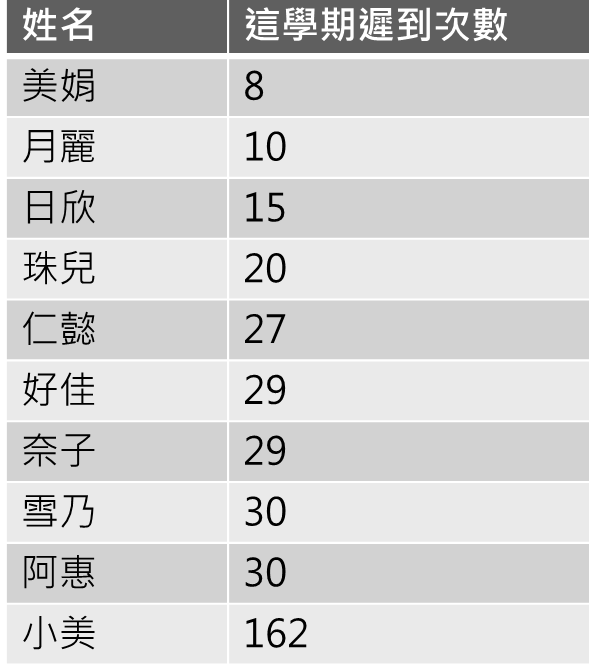
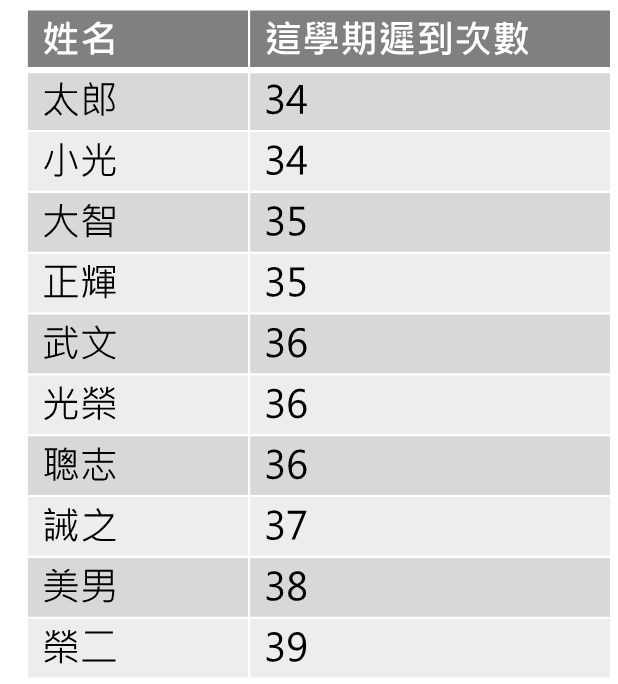

In [57]:
import numpy as np
girl=np.array([8,10,15,20,27,29,29,30,30,162])
boy=np.array([34,34,35,35,36,36,36,37,38,39])
print(girl)
print(boy)
girl_mean=np.mean(girl)
print("girl mean",girl_mean)
boy_mean=np.mean(boy)
print("boy mean",boy_mean)
girl_median=np.median(girl)
print("girl median",girl_median)
boy_median=np.median(boy)
print("boy median",boy_median)
girl_std=np.std(girl)
print("girl std",girl_std)
boy_std=np.std(boy)
print("boy std",boy_std)

[  8  10  15  20  27  29  29  30  30 162]
[34 34 35 35 36 36 36 37 38 39]
girl mean 36.0
boy mean 36.0
girl median 28.0
boy median 36.0
girl std 42.75979419969184
boy std 1.5491933384829668


+ np.ptp( ) 計算最大與最小值的差（最大 -(減) 最小）。

In [58]:
import numpy as np
a = np.array([[0, 30,45],[60,75,90]])
print(a)
print()
print("---------------")
print(np.ptp(a))# 90-0
b=np.ptp(a, axis = 0)# [60-0,75-30,90-45]
print(b)
print("---------------")
b=np.ptp(a, axis = 1)#[45 -0,90-60]
print(b)
print("---------------")

[[ 0 30 45]
 [60 75 90]]

---------------
90
[60 45 45]
---------------
[45 30]
---------------


+ np.percentile( ) 方法代表百分位數，用於統計數據的度量指標，需要三個參數：
  + array：陣列。
  + percent：計算的百分位數，介於 0 到 100 之間。
  + axis：進行計算的軸。

In [61]:
arry = np.array([4,6,10,12,8])
#                           1 2 3  4 5 
# 注意percentile會在內部排序 4 6 8 10 12
# n是長度
# 位置=1+(n-1)*p n是全部元素的數量 p是百分比 
#以下案例是:n=5 p=50
"""
先算出位置:
index 第一個是 1所以計算+是最左邊的位置 
(5-1)*0.5 計算由最左邊位置右移多少到估算的百分比
1+(5-1)*0.5 = 3
正好落在 index為3的位置 答案是8
"""
b = np.percentile(arry, 50) 
print(b)

8.0


In [62]:
#以下案例是:n=6 p=25
# 1 2 3 4 5 6
# 1 4 5 8 9 11
a = np.array([[11, 8, 9], [5, 4, 1]])
"""
先算出位置:
1+(6-1)X0.25 = 2.25
因為落在2.25所以index為2與3之間的數值
如果沒落在點上在由計算好的點往下移動
2.25的小數部分取出 0.25 所以下列公式乘上0.25 
因有小數部分進行內插計算。
因為2的部分算好了 接下來要計算0.25的部分 這部分是5-4之間差值的0.25
因為第一個數字是4所以是4
4 + (5-4) * 0.25  = 4.25
"""
b = np.percentile(a, 25)
print("The percentile is:",b) 


The percentile is: 4.25


## 累加與累差
+ np.cumsum( ) 方法進行指定軸資料的累加。
+ 參數：
  + array：陣列
  + axis：軸，沒有指定軸則會平坦化後進行累加
+ 維持原有的資料數量，且在計算結果上進行下一個計算。
+ np.diff( ) 方法進行指定軸資料的累差。
+ 參數：
  + array：陣列
  + axis：軸，沒有指定軸預設 axis 為 1
+ 以原資料進行資料內容刪除，若 axis 為 0 則減少一個 row，若 axis 為 1 減少一個 column。

In [63]:
import numpy as np
a = np.array([[1, 2, 3], 
              [13, 6, 9], 
              [12, 24, 36]])
print(a)
print(np.cumsum(a))
print("---------------")
print(np.cumsum(a,axis=0))
print("---------------")
print(np.cumsum(a,axis=1))
print("---------------")

[[ 1  2  3]
 [13  6  9]
 [12 24 36]]
[  1   3   6  19  25  34  46  70 106]
---------------
[[ 1  2  3]
 [14  8 12]
 [26 32 48]]
---------------
[[ 1  3  6]
 [13 19 28]
 [12 36 72]]
---------------


In [65]:
import numpy as np
a = np.array([[1, 2, 3], 
              [13, 6, 9]])
print(a)
print("---------------")
print(np.diff(a))#預設axis=1
print("---------------")
print(np.diff(a,axis=0))#[13-1,6-2,9-3]
print("---------------")
print(np.diff(a,axis=1))#[2-1,3-2]
                        #[6-13,9-6]
print("---------------")

[[ 1  2  3]
 [13  6  9]]
---------------
[[ 1  1]
 [-7  3]]
---------------
[[12  4  6]]
---------------
[[ 1  1]
 [-7  3]]
---------------


### figure 可加入參數
+ plt.figure( ) 方法會建立一個圖像，該代碼後的所有圖像會繪製到這個圖像中，一個項目中可以添加多個  figure，常用參數如下：
 + num：設置圖像的序號，不設置該參數，自動默認編號。
 + figsize：設置圖像大小。
 + facecolor：圖像前景色。
 
 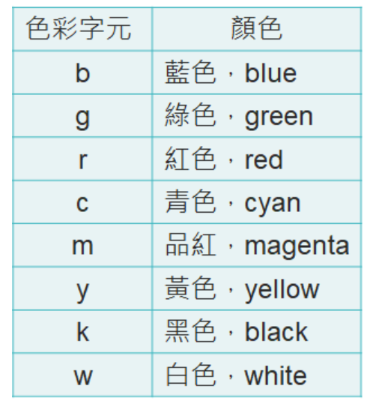
 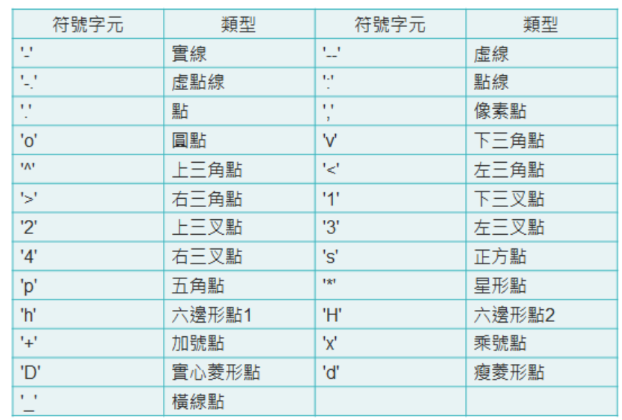

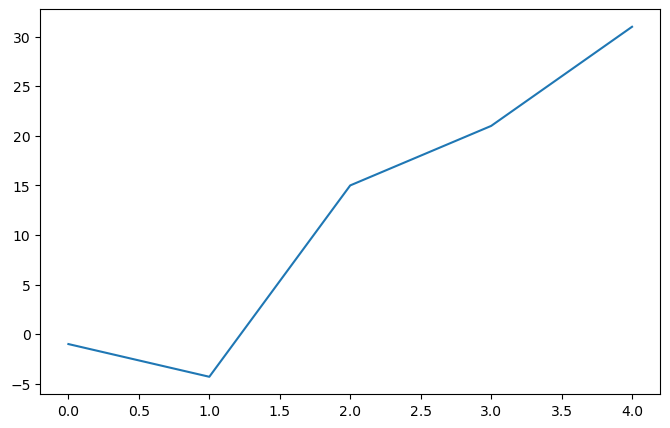

In [69]:
import matplotlib.pyplot as plt
data = [-1, -4.3, 15, 21, 31]
plt.figure(figsize=(8,5))
plt.plot(data)
plt.show()

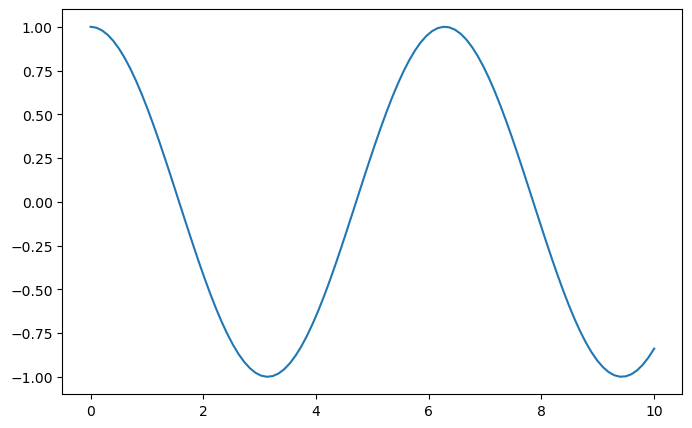

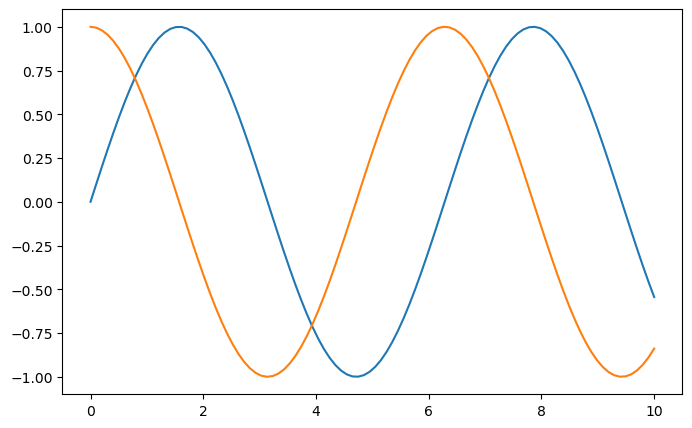

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# 創建第一個圖形，編號為 1
plt.figure(num=1,figsize=(8, 5))
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

plt.figure(num=2,figsize=(8, 5))
plt.plot(x, np.cos(x))

plt.figure(num=1)
plt.plot(x, np.cos(x))

8
8


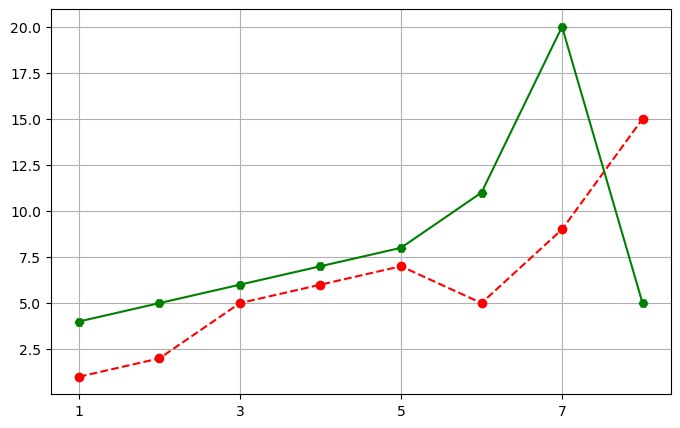

In [97]:
import  matplotlib.pyplot as plt
import  numpy as np
y1=[1,2,5,6,7,5,9,15]
y2=[4,5,6,7,8,11,20,5]
print(len(y1))
print(len(y2))
a=len(y1)+1
x=np.arange(1,a)
plt.figure(num=30,figsize=(8,5))
plt.plot(x,y1,'r--o') 
plt.plot(x,y2,'g-H')
#plt.xlim(3,7)
plt.xticks([1,3,5,7],('1','3','5','7'))
plt.grid()
plt.show() 

# 子圖表 (1)
+ 一個 Figure 對象可以包含多個子圖 (Axes)，預設三個參數：
  + num_rows：幾個 rows。
  + num_cols：幾個 columns。
  + plot_num：代表第幾張圖表。
+ 然後按照從左到右，從上到下的順序對每個子區域進行編號，左上的子區域的編號為 1。
+ Plot_num 參數指定創建的 Axes 對象所在的區域。
+ 如果 numRows ＝ 2、numCols ＝ 3，那整個繪製圖表樣式為 2×3 的圖片區域,用坐標表示為
  + (1, 1), (1, 2), (1, 3)
  + (2, 1), (2, 2), (2, 3)
+ 當 plotNum ＝ 3 時,表示的坐標為 (1, 3)，即第一 row 第三 column 的子圖。
+ 如果 numRows、numCols 和 plotNum 這三個數都小於 10 的話，可以把它們縮寫為一個整數，例如 subplot(232) 和 subplot(2,3,2) 是相同的。
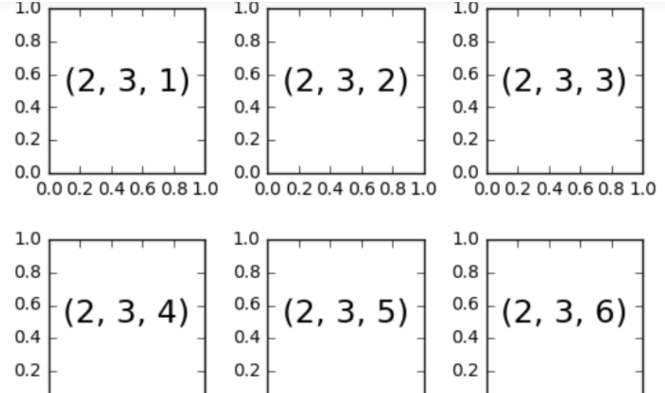

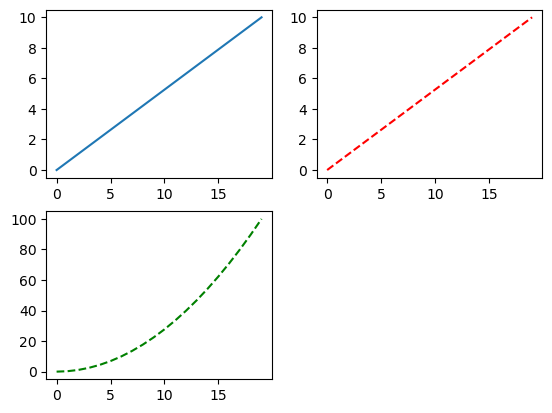

In [102]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0, 20.0, 1)
s = np.linspace(0, 10, 20)
# 左往右數第幾張
plt.subplot(2, 2, 1) #產生2 x 2的圖表 第1張
plt.plot(t, s)
plt.subplot(2, 2, 2)#產生2 x 2的圖表 第2張
plt.plot(t, s, 'r--')
plt.subplot(223)#產生2 x 1的圖表 第3張
plt.plot(t, s**2, 'g--')
plt.show()

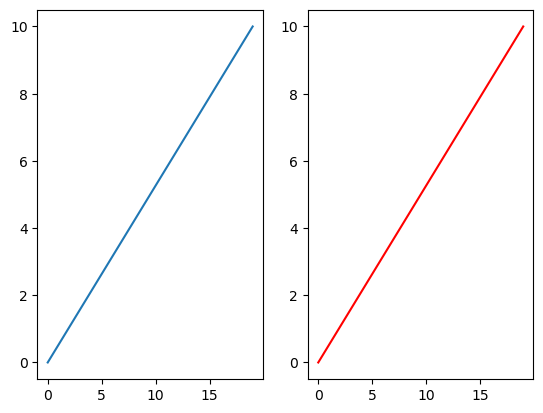

In [103]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0, 20.0, 1)
s = np.linspace(0, 10, 20)
plt.subplot(1, 2, 1)#一共2張 其中的第一張
plt.plot(t, s)
plt.subplot(1, 2, 2)#一共2張 其中的第二張
plt.plot(t, s, 'r-')
plt.show()

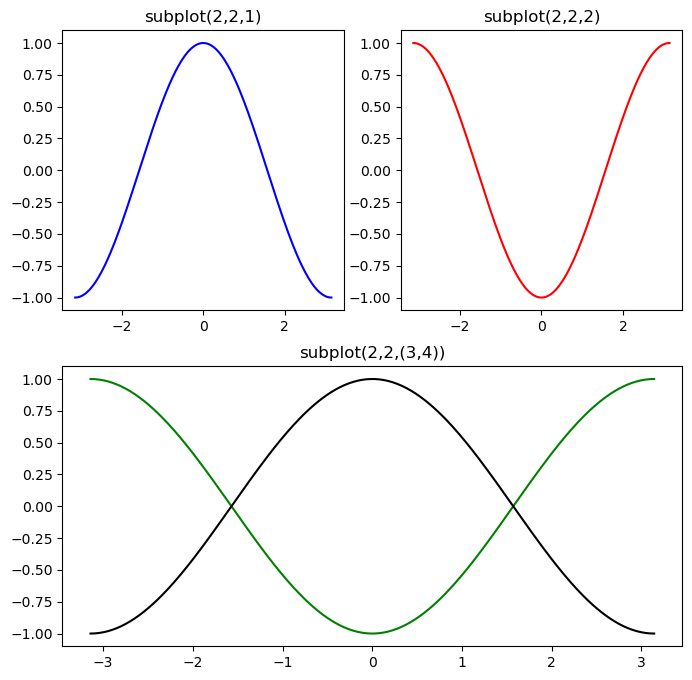

In [104]:
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256)# 負pi 到正pi 間格取256
Y = np.cos(X)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(X, Y, color="blue")
plt.title('subplot(2,2,1)')
plt.subplot(2,2,2)
plt.plot(X, Y*-1, color="red")
plt.title('subplot(2,2,2)')
plt.subplot(2,2,(3,4))
plt.plot(X, Y*-1, color="green")
plt.plot(X, Y, color="black")
plt.title('subplot(2,2,(3,4))')
plt.show( )

## 水平線
plt.axhline(Y軸資料,位置起點,位置終點,其他參數)
### 垂直線
plt.axvline(X軸資料,位置起點,位置終點,其他參數)

這兩個方法的第二個與第三個參數其實是指圖表中的位置比例。

第二個位置預設為0，代表位置的起點。

第三個位置預設為1，代表位置的終點。

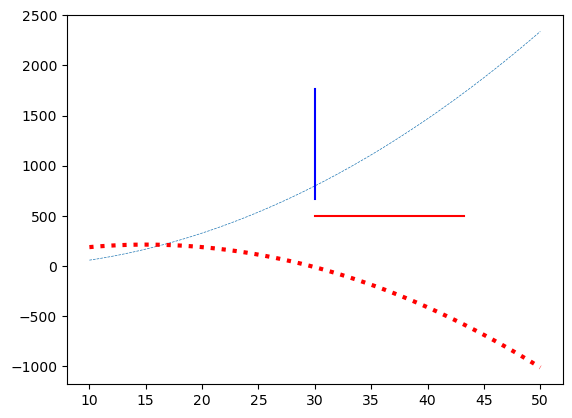

In [120]:
import  matplotlib.pyplot as plt
import  numpy as np
x=np.linspace(10,50,50)
y1=-np.power(x,2)+30*x-11
y2=np.power(x,2)-3*x-11
plt.plot(x,y2,linewidth=0.5,linestyle='--')
plt.plot(x,y1,color='red',linewidth=3.0,linestyle=':')
#80%開始到50%
plt.axvline(30,0.8,0.5,color='blue')
#80%開始到50%
plt.axhline(500,0.8,0.5,color='red')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22402 (\N{CJK UNIFIED IDEOGRAPH-5782}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38988 (\N{CJK UNIFIED IDEOGRAPH-984C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_

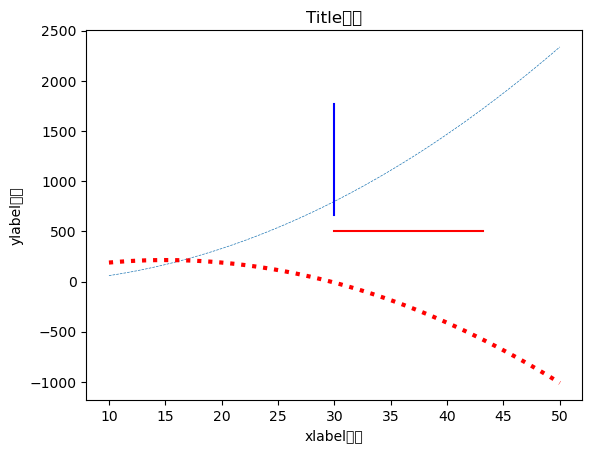

In [121]:
import  matplotlib.pyplot as plt
import  numpy as np
x=np.linspace(10,50,50)
y1=-np.power(x,2)+30*x-11
y2=np.power(x,2)-3*x-11
plt.plot(x,y2,linewidth=0.5,linestyle='--')
plt.plot(x,y1,color='red',linewidth=3.0,linestyle=':')
plt.axvline(30,0.8,0.5,color='blue')
plt.axhline(500,0.8,0.5,color='red')
plt.title('Title標題')
plt.xlabel('xlabel水平')
plt.ylabel('ylabel垂直')
plt.show()

In [122]:
import matplotlib.font_manager as fm
path = r'NotoSerifCJKtc-Medium.otf'
fontprop = fm.FontProperties(fname=path, size=13)

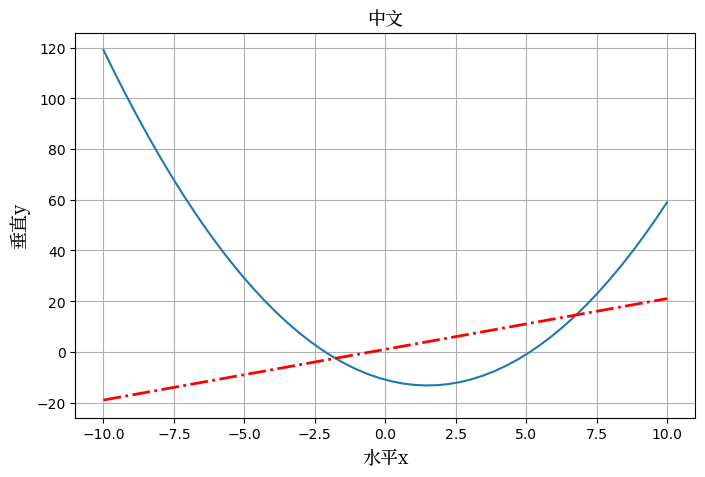

In [123]:
import  matplotlib.pyplot as plt
import  numpy as np
plt.figure(figsize=(8,5))
x=np.linspace(-10,10,50)
y1=2*x+1
y2=x**2-3*x-11
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=2.0,linestyle='dashdot')
plt.grid()
plt.title('中文',fontproperties=fontprop)
plt.xlabel('水平x',fontproperties=fontprop)
plt.ylabel('垂直y',fontproperties=fontprop)
plt.show()

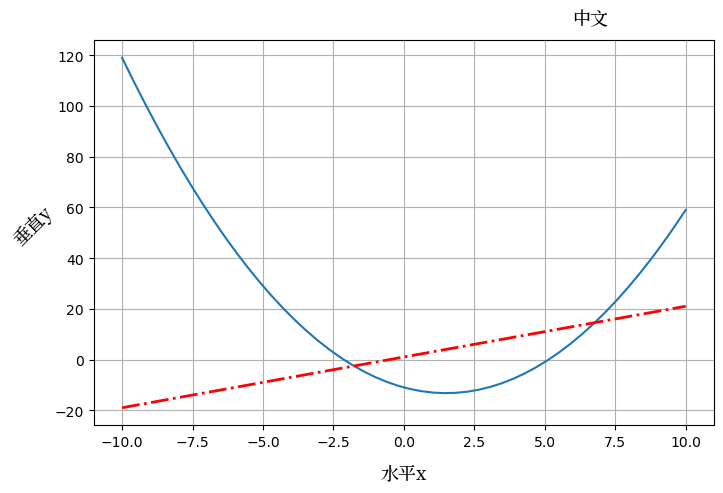

In [135]:
import  matplotlib.pyplot as plt
import  numpy as np
plt.figure(figsize=(8,5))
x=np.linspace(-10,10,50)
y1=2*x+1
y2=x**2-3*x-11
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=2.0,linestyle='dashdot')
plt.grid()
plt.title('中文',fontproperties=fontprop,x=0.8,y=1.02)
plt.xlabel('水平x',fontproperties=fontprop,labelpad=10)
plt.ylabel('垂直y',fontproperties=fontprop,rotation=45,labelpad=10)
plt.show()

## Bar 與 Stacked Bar
+ Bar  長條圖：可以垂直或水平繪製
+ Stacked  堆疊長條圖：多項資料的數據一一堆疊，可顯示每一長條的相對組成。

matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

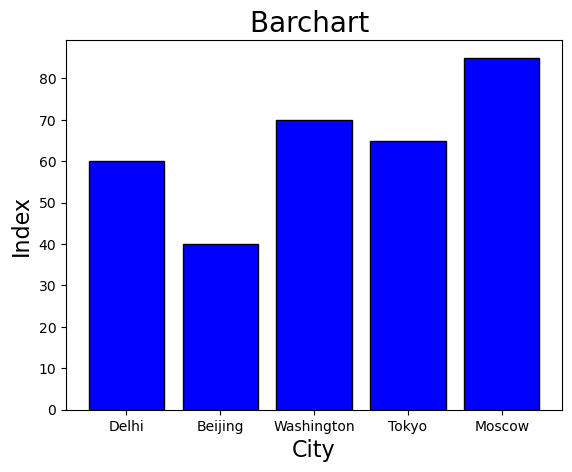

In [136]:
import matplotlib.pyplot as plt
import numpy as np
city = ['Delhi', 'Beijing', 'Washington', 'Tokyo', 'Moscow']
pos = np.arange(len(city))
Happiness_Index = [60, 40, 70, 65, 85]
plt.bar(pos, Happiness_Index, color='blue', edgecolor='black')
plt.xticks(pos, city)
plt.xlabel('City', fontsize=16)
plt.ylabel('Index', fontsize=16)
plt.title('Barchart ', fontsize=20)
plt.show( )

+ 圖例於視覺上造成阻礙。
+ 堆疊長條圖顯示方式略作調整。
+ loc編號
|功能         |編號|
|-------------|-----|
|最好(右上)預設| 0  |
|右上方	   | 1   |
|左上	       | 2|
|左下角	      | 3|
|右下	       | 4|
|對	        | 5|
|中左	       | 6|
|中右	       | 7|
|下中心	      | 8|
|上中	       | 9|
|中央	       | 10|

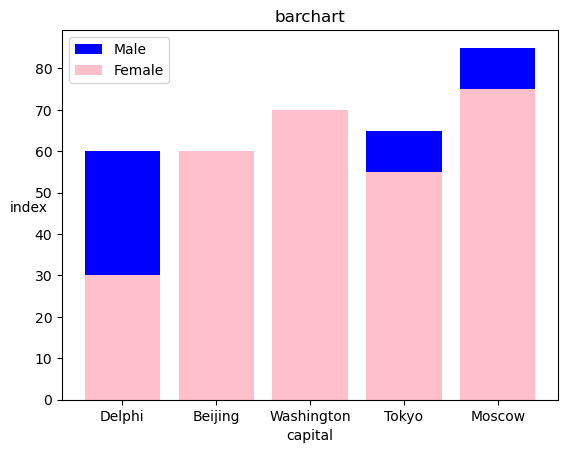

In [141]:
import  matplotlib.pyplot as plt
import  numpy as np
city=['Delphi','Beijing','Washington','Tokyo','Moscow']
pos=np.arange(len(city))
gender=['Male','Female']
happing_index_male=[60,40,70,65,85]
happing_index_female=[30,60,70,55,75]
plt.bar(pos,happing_index_male,color='blue')
plt.bar(pos,happing_index_female,color='pink')
plt.xticks(pos,city) 
plt.xlabel('capital')
plt.ylabel('index',rotation=0)
plt.legend(gender,loc=2)#小圖示
plt.title('barchart')
plt.show()

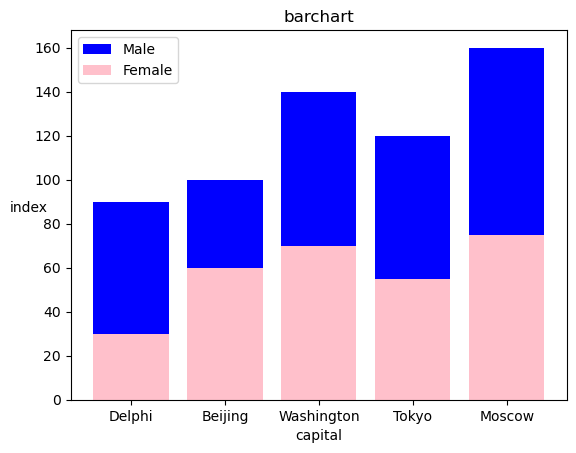

In [144]:
import  matplotlib.pyplot as plt
import  numpy as np
city=['Delphi','Beijing','Washington','Tokyo','Moscow']
pos=np.arange(len(city))
gender=['Male','Female']
happing_index_male=[60,40,70,65,85]
happing_index_female=[30,60,70,55,75]
#bottom=happing_index_female由happing_index_femaled開始畫
plt.bar(pos,happing_index_male,color='blue',bottom=happing_index_female)
plt.bar(pos,happing_index_female,color='pink')
plt.xticks(pos,city) 
plt.xlabel('capital')
plt.ylabel('index',rotation=0)
plt.legend(gender,loc=2)
plt.title('barchart')
plt.show()

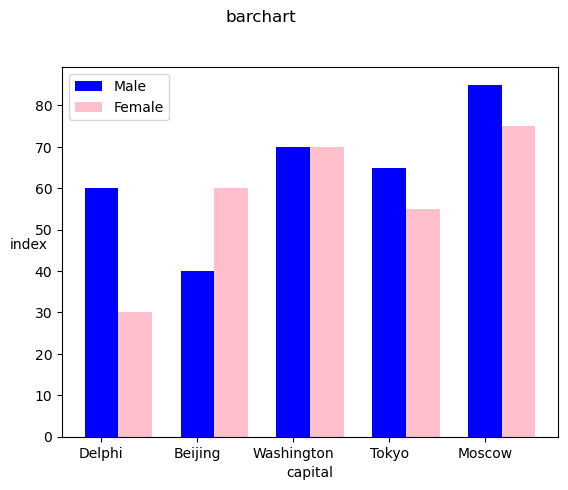

In [148]:
import  matplotlib.pyplot as plt
import  numpy as np
city=['Delphi','Beijing','Washington','Tokyo','Moscow']
pos=np.arange(len(city))
bar_width=0.35
gender=['Male','Female']
happing_index_male=[60,40,70,65,85]
happing_index_female=[30,60,70,55,75]
plt.bar(pos,happing_index_male,bar_width,color='blue')
plt.bar(pos+bar_width,happing_index_female,bar_width,color='pink')#在旁邊
plt.xticks(pos,city) 
plt.xlabel('capital')
plt.ylabel('index',rotation=0)
plt.legend(gender,loc=2) 
plt.title('barchart',x=0.4,y=1.1)
plt.show()

## 散佈圖 Scatter

身高的平均: 169.375
身高的中位: 167.0
體重的平均: 57.75
體重的中位: 57.5


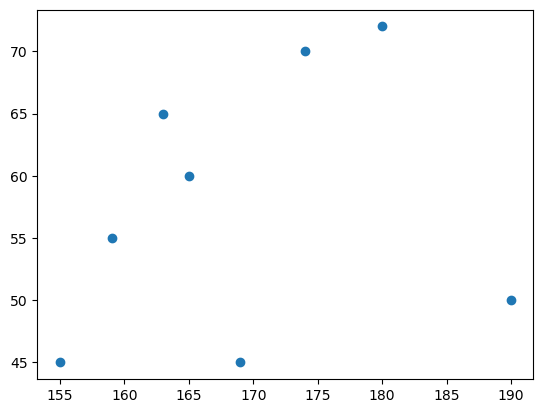

In [156]:
import matplotlib.pyplot as plt
import numpy as np
h=np.array([159,169,174,165,163,155,180,190])
w=np.array([55,45,70,60,65,45,72,50])
print("身高的平均:",np.mean(h))
print("身高的中位:",np.median(h))
print("體重的平均:",np.mean(w))
print("體重的中位:",np.median(w))
#'散佈圖
pos = np.arange(len(h))
plt.scatter(h,w)
#plt.grid()
plt.show()

[159 169 174 165 163 155 180 190]
[55 45 70 60 65 45 72 50]


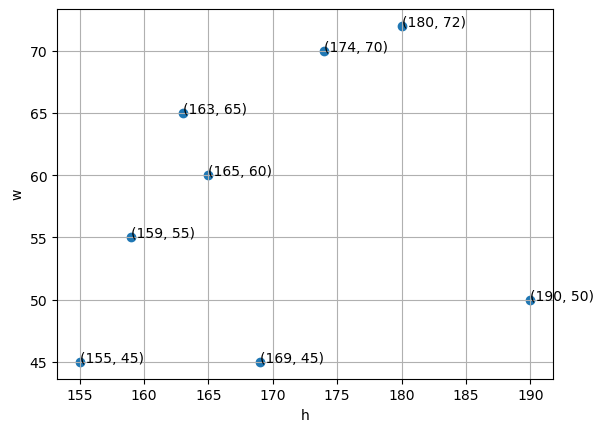

In [154]:
import matplotlib.pyplot as plt
import numpy as np
h=np.array([159,169,174,165,163,155,180,190])
w=np.array([55,45,70,60,65,45,72,50])
print(h)
print(w)
plt.scatter(h,w)
plt.xlabel('h')
plt.ylabel('w')
#plt.text(160,60,'test1',fontsize=20)
for temp1 in zip(h,w):
  #print(temp1)
  plt.text(temp1[0],temp1[1],temp1,fontsize=10)
plt.grid()
plt.show()


### Hist 直方圖：顯示資料頻率或著數值資料各類別範圍中的資料。

20


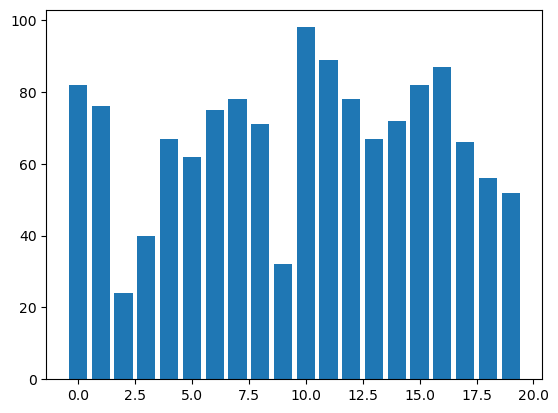

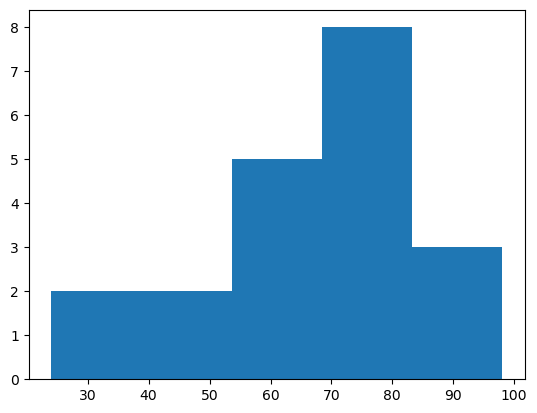

In [157]:
import  numpy as np
import  matplotlib.pyplot as plt
values = [82, 76, 24, 40, 67, 62, 75, 78, 71, 32, 98, 89, 78, 67, 72, 82, 87, 66, 56, 52]
print(len(values))
x1=np.arange(len(values))
plt.bar(x1,values)
plt.show()
plt.hist(values,bins=5)#bins分5個
plt.show()

## 圓餅

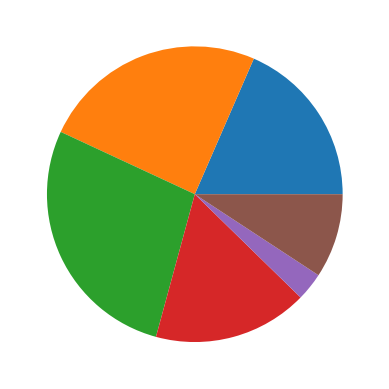

上面看不出來誰是誰


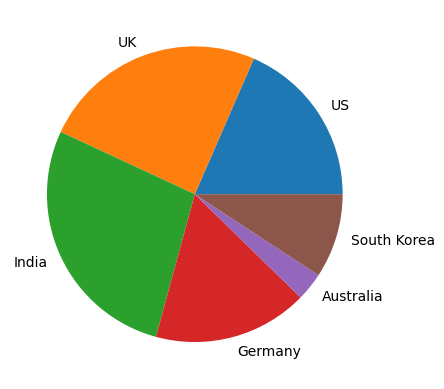

美國部份希望突出


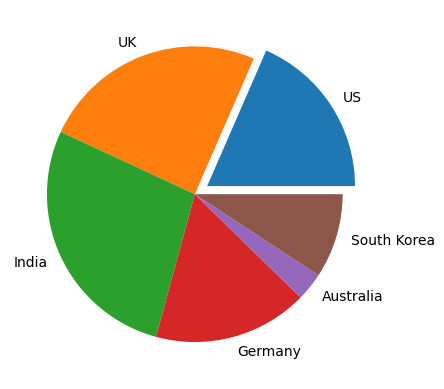

In [161]:
import matplotlib.pyplot as plt
import numpy as np
values=[60,80,90,55,10,30]
colors=['b','g','r','c','m','y']
labels=['US','UK','India','Germany','Australia','South Korea']
explode=(0.1,0,0,0,0,0)
plt.pie(values)
plt.show()
print('上面看不出來誰是誰')
plt.pie(values,labels=labels)#加上文字
plt.show()
print('美國部份希望突出')
plt.pie(values,labels=labels,explode=explode)
plt.show()

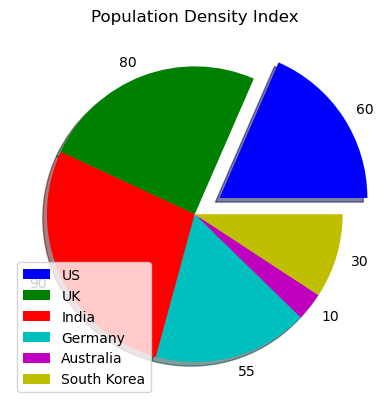

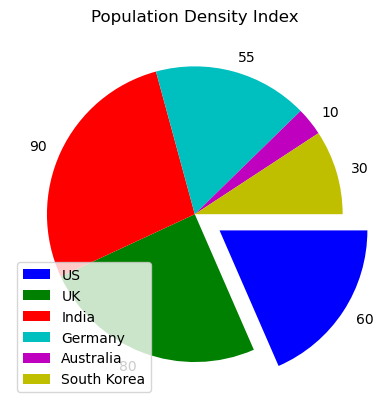

In [168]:
import matplotlib.pyplot as plt
values = [60, 80, 90, 55, 10, 30]
colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = ['US', 'UK', 'India', 'Germany', 'Australia', 'South Korea']
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels=values, explode=explode, counterclock=True, shadow=True)
plt.title('Population Density Index')
plt.legend(labels, loc=3)
plt.show()

plt.pie(values, colors=colors, labels=values, explode=explode, counterclock=False)
plt.title('Population Density Index')
plt.legend(labels, loc=3)
plt.show( )

## 箱型圖

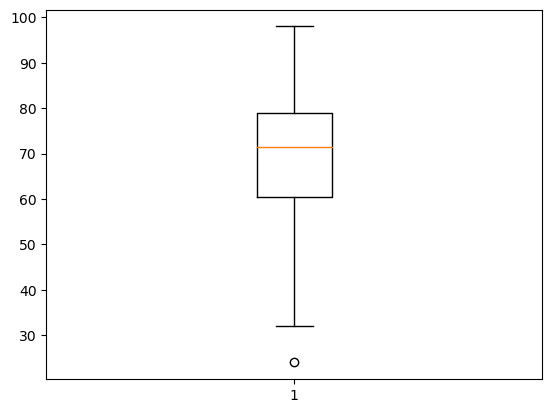

Q1: 60.5
Q3: 79.0
18.5


In [175]:
import matplotlib.pyplot as plt
value1 = [82, 76, 24, 40, 67, 62, 75, 78, 71, 32, 98, 89, 78, 67, 72, 82, 87, 66, 56, 52]
d1 = plt.boxplot(value1,whis=1.5)
plt.show()

print("Q1:",d1["boxes"][0].get_ydata()[1])#%25
print("Q3:",d1["boxes"][0].get_ydata()[2])#%75
Q1 = d1['boxes'][0].get_ydata()[1]
Q3 = d1['boxes'][0].get_ydata()[2]
IQR = Q3 - Q1
print(IQR)#18.5
#Q1 60.5 %25
#Q3 79.0 %75

#最高98
#最小40
# 1.5 * 18.5 = 27.75
# IRQ = 79.0 - 60.5 = 18.5

#最大值 75% 上鬚  min(98, 106.75) min(最大值, Q3 + 1.5 * IRQ)
#最小值 25% 下鬚 max(24, 32.75) = 32.75 開始不列為離群值 max(最小值, Q1 - 1.5 * IRQ)


## Pandas

In [177]:
import pandas as pd
import numpy as np
fruits  = ['蘋果','橘子','梨子','櫻桃']
quantities = [15,33,45,55]
n1 = np.array(quantities)
s1 = pd.Series(quantities)
s2 = pd.Series(quantities,index=fruits)
print(n1)
print("===="*20)
print(s1)
print("===="*20)
print(s2)
print("-"*70)
print(s2["梨子"])

[15 33 45 55]
0    15
1    33
2    45
3    55
dtype: int64
蘋果    15
橘子    33
梨子    45
櫻桃    55
dtype: int64
----------------------------------------------------------------------
45


In [178]:
import  pandas as pd
import  numpy as np
fruits=['蘋果','橘子','梨子','櫻桃']
quantities=[15,33,45,55]
s1=pd.Series(quantities)
s2=pd.Series(quantities,index=fruits)
print(s1);print('-'*70)
print(s2);print('-'*70)
print(s1.median())
print(s1.mean())
print(s1.min())
print(s1.max())
print(s1.describe())#輸出一群

0    15
1    33
2    45
3    55
dtype: int64
----------------------------------------------------------------------
蘋果    15
橘子    33
梨子    45
櫻桃    55
dtype: int64
----------------------------------------------------------------------
39.0
37.0
15
55
count     4.000000
mean     37.000000
std      17.204651
min      15.000000
25%      28.500000
50%      39.000000
75%      47.500000
max      55.000000
dtype: float64


In [195]:
import pandas as pd
data = {"Name":['Tom','Jack','Steve',"Ricky"],
       "Age":[28,34,29,42]}
print(type(data))
print(data)
df = pd.DataFrame(data)
print(df)
df2 = pd.DataFrame(data,index=["m1","m2","m3","m4"])
print(df2)

<class 'dict'>
{'Name': ['Tom', 'Jack', 'Steve', 'Ricky'], 'Age': [28, 34, 29, 42]}
    Name  Age
0    Tom   28
1   Jack   34
2  Steve   29
3  Ricky   42
     Name  Age
m1    Tom   28
m2   Jack   34
m3  Steve   29
m4  Ricky   42
